In [2]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
# Libraries for handling URL and file operations
import urllib                     # Library for handling URL operations
import os                         # Library for interacting with the operating system
import zipfile                    # Library for handling zip file operations

# Libraries for numerical and scientific computation
import numpy as np                # NumPy: manipulation of numerical arrays
import scipy.ndimage as ndi       # The image processing package scipy.ndimage
from scipy.ndimage import gaussian_filter  # Gaussian filter function from scipy.ndimage
from math import log10            # Math library for logarithmic calculations
import random                     # Library for random number generation

# Libraries for data visualization and plotting
import matplotlib.pyplot as plt   # The plotting module matplotlib.pyplot as plt
import seaborn as sns             # Seaborn: data visualization library
import pandas as pd               # Pandas: data manipulation and analysis library
import time                       # Time library for measuring execution time

# Libraries for image processing and handling
from PIL import Image             # Pillow: image processing library
from skimage import io            # Scikit-image: image I/O
from skimage.metrics import structural_similarity as ssim  # SSIM: structural similarity index for image quality assessment
from skimage.metrics import peak_signal_noise_ratio as psnr  # PSNR: peak signal-to-noise ratio for image quality assessment
from sklearn.metrics import mean_squared_error as mse  # MSE: mean squared error for image quality assessment
from sklearn.metrics import mean_absolute_error as mae  # MAE: mean absolute error for image quality assessment


# Libraries for machine learning and neural networks
import torch                      # PyTorch: deep learning library
import torch.nn as nn             # PyTorch neural network module
import torch.optim as optim       # PyTorch optimization module
from torch.utils.data import DataLoader, Dataset, random_split  # DataLoader and Dataset modules from PyTorch
from torchvision import transforms  # Transforms module from torchvision for image transformations
!pip install torchsummary
from torchsummary import summary    # Summary module from torchsummary for model summary

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


In [3]:
# Check GPU
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
# Allocate memory on the GPU dynamically
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'    # Allow GPU memory to grow as needed

True
NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [4]:
# Set seeds for reproducibility
def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# DataLoader setup
def worker_init_fn(worker_id):
    np.random.seed(42 + worker_id)
    random.seed(42 + worker_id)


# Set seeds for reproducibility
set_seed(20)

In [5]:
# Function to rescale intensities
def rescale_intensity(image, Imin, Imax):
    """
    Rescale the intensity of an image from the range (Imin0, Imax0) to (Imin, Imax).

    Parameters:
    - image: numpy array, input image with intensity values in the range (Imin0, Imax0)
    - Imin: int or float, minimum intensity value in the output image
    - Imax: int or float, maximum intensity value in the output image

    Returns:
    - numpy array, image with intensity values rescaled to the range (0, 255)
    """
    # get min and max values
    Imin0 = np.amin(image)
    Imax0 = np.amax(image)

    # Save the original data type of the image
    original_dtype = image.dtype

    # Convert image to float for operations
    image = image.astype(float)

    # Rescale the intensities
    rescaled_image = ((image - Imin0) / (Imax0 - Imin0))  # Nomrlaizes to (0,1)
    rescaled_image = (rescaled_image * (Imax - Imin)) + Imin  # Scales to (Imin, Imax)

    # Clip the values to ensure they are within [0, 255]
    rescaled_image = np.clip(rescaled_image, Imin, Imax)

    # Convert back to the original data type
    rescaled_image = rescaled_image.astype(original_dtype)

    return rescaled_image

In [6]:
# Function to plot pairs of images

def pltPair(img1, img2, title1, title2, cmap1, cmap2, lim, fig_size):
    """This function displays a pair of input image with interpolation='none',in the range of lims. """

    plt.figure(figsize=(fig_size,fig_size))
    plt.subplot(1,2,1)
    plt.imshow(img1, interpolation='none', cmap=cmap1, vmin=lim[0], vmax=lim[1])
    plt.title(title1)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.subplot(1,2,2)
    plt.imshow(img2, interpolation='none', cmap=cmap2, vmin=lim[2], vmax=lim[3])
    plt.title(title2)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.show()


In [7]:
filename_lowSNR  = r'/home/davas/Documents/EPIC_4/final/noise_type_detection_dataset/train/impulse/2092sltpepprimgNoise0.95.jpg'
filename_highSNR = r'/home/davas/Documents/EPIC_4/final/noise_type_detection_dataset/train/gaussian/2092gauimgNoise10.jpg'

In [8]:
# Load the images

# Import the function 'imread' from the module 'skimage.io'.
from skimage.io import imread

img_lowSNR  = imread(filename_lowSNR)
img_highSNR = imread(filename_highSNR)

print('Variable Type: ', type(img_lowSNR))
print('Image data type: ', img_lowSNR.dtype)
print('Image dimension: ', img_lowSNR.shape)
print('Max Intensity low SNR: ', np.amin(img_lowSNR))
print('Min Intensity low SNR: ', np.amax(img_lowSNR))
print('Max Intensity high SNR: ', np.amin(img_highSNR))
print('Min Intensity high SNR: ', np.amax(img_highSNR))


Variable Type:  <class 'numpy.ndarray'>
Image data type:  uint8
Image dimension:  (321, 481)
Max Intensity low SNR:  0
Min Intensity low SNR:  255
Max Intensity high SNR:  0
Min Intensity high SNR:  255


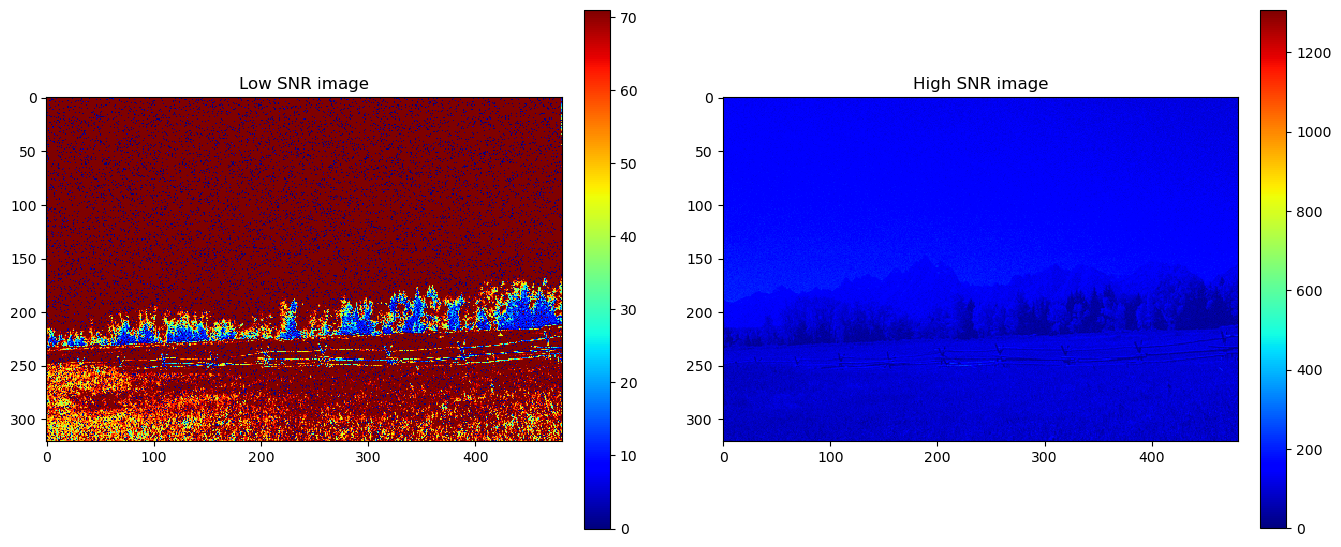

In [11]:
# Plot images

pltPair(img_lowSNR, img_highSNR, 'Low SNR image', 'High SNR image', 'jet', 'jet', [0,71,0,1307], 16)

Max Intensity low SNR:  0
Min Intensity low SNR:  255
Max Intensity high SNR:  0
Min Intensity high SNR:  255


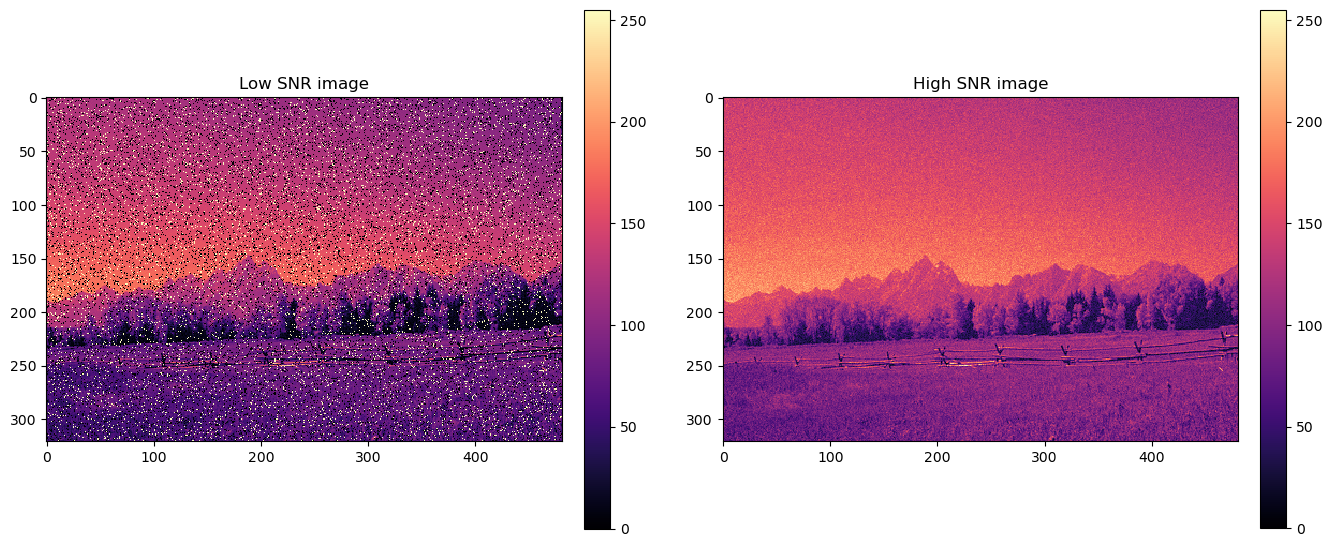

In [12]:
img_lowSNR = rescale_intensity(img_lowSNR, 0, 255)
img_highSNR = rescale_intensity(img_highSNR, 0, 255)

print('Max Intensity low SNR: ', np.amin(img_lowSNR))
print('Min Intensity low SNR: ', np.amax(img_lowSNR))
print('Max Intensity high SNR: ', np.amin(img_highSNR))
print('Min Intensity high SNR: ', np.amax(img_highSNR))


pltPair(img_lowSNR, img_highSNR, 'Low SNR image', 'High SNR image', 'magma', 'magma', [0,255,0,255], 16)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_5578/3643974175.py:6: SyntaxWarning: invalid escape sequence '\s'
  txt = "$\sigma$ =" + str(sigma)
/tmp/ipykernel_5578/3643974175.py:7: SyntaxWarning: invalid escape sequence '\s'
  pltPair(img_lowSNR, img_smooth_test, 'Low SNR image', 'Smoothed Image with '+"$\sigma$ =" + str(sigma), 'magma', 'magma', [0,255,0,255], 12)


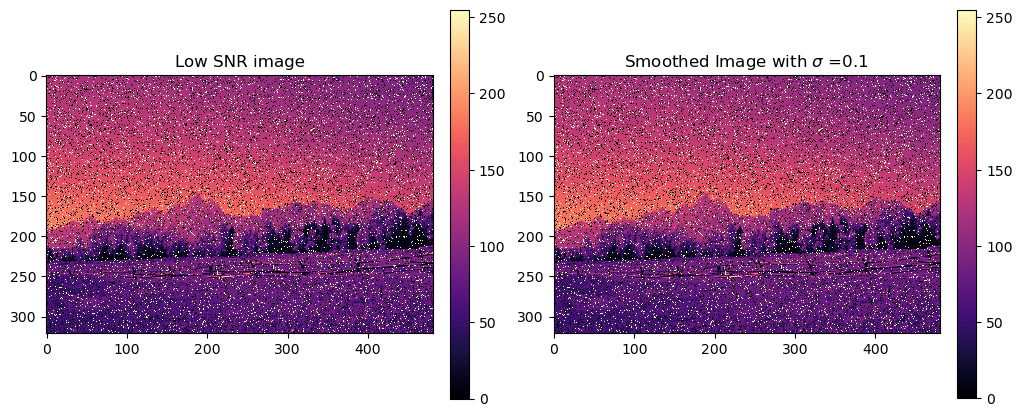

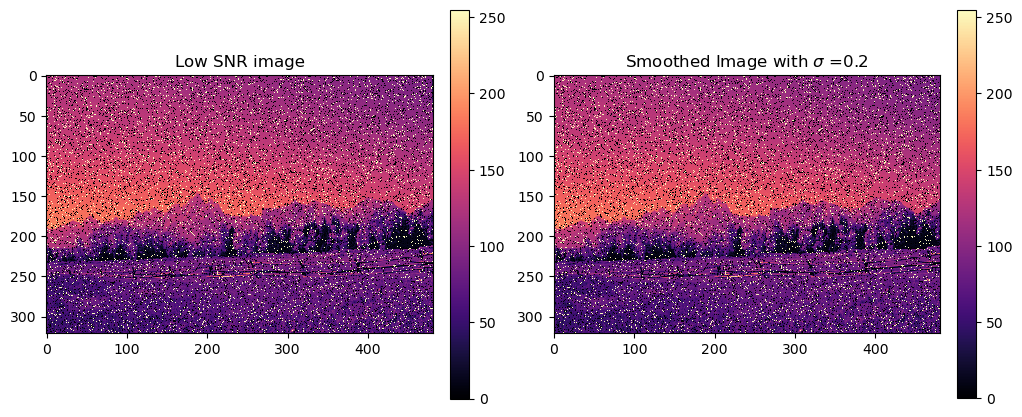

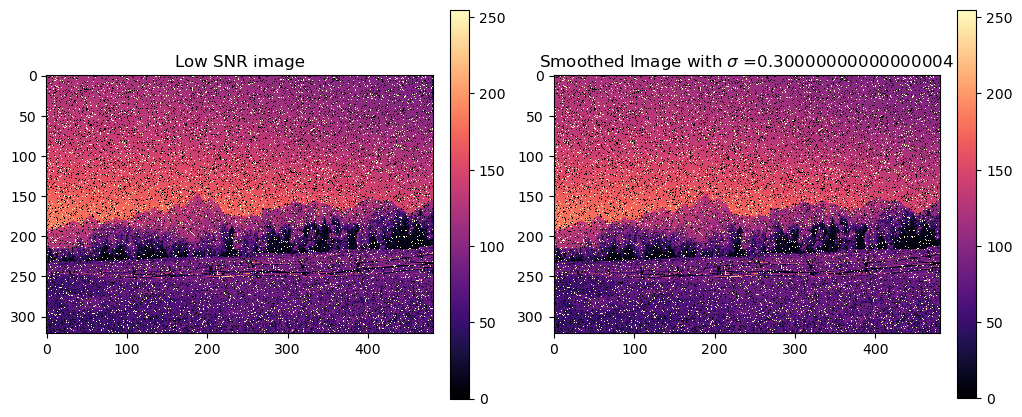

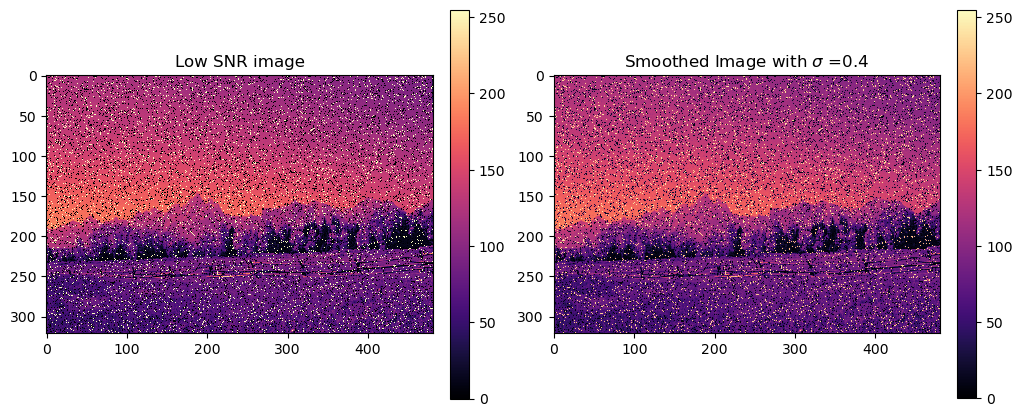

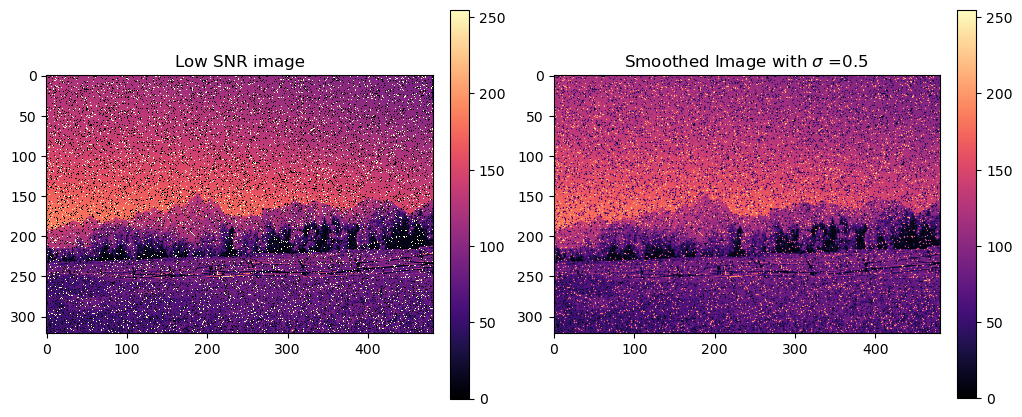

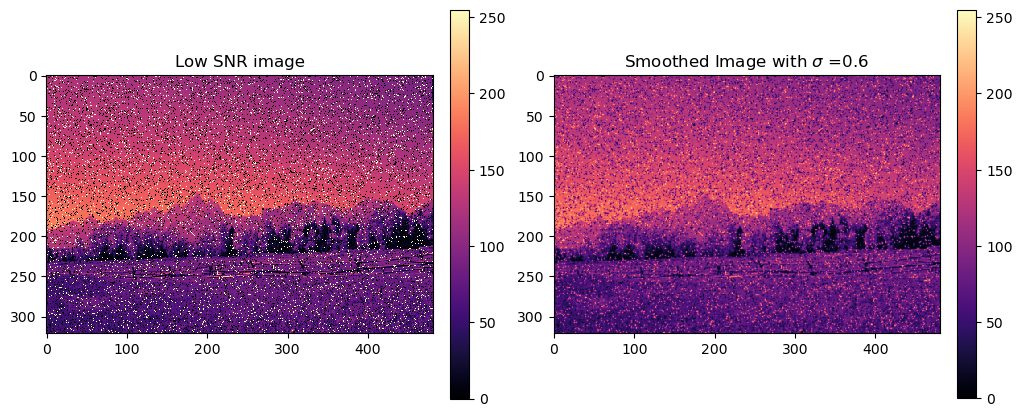

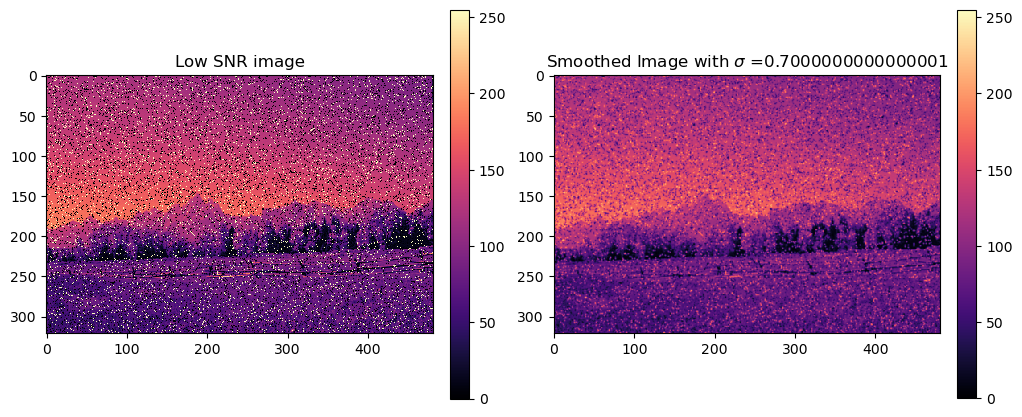

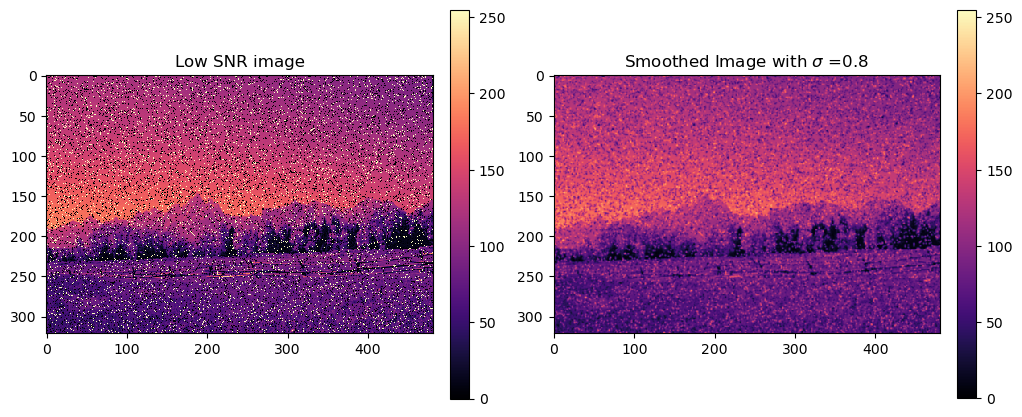

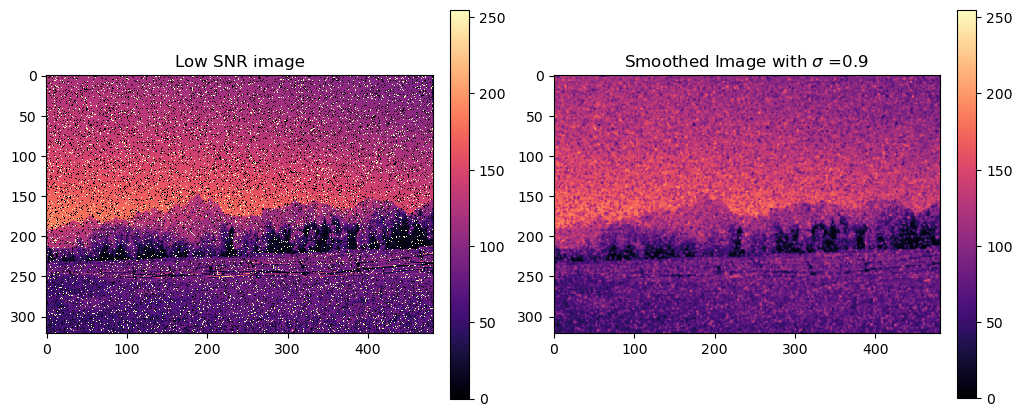

In [20]:
# Probar varios valores para el factor de suavizado sigma
sigmas = np.arange(0.1, 1, 0.1)  # Genera valores de sigma desde 0.1 hasta 1.0 con un paso de 0.1

for sigma in sigmas:
    img_smooth_test = gaussian_filter(img_lowSNR, sigma)
    txt = "$\sigma$ =" + str(sigma)
    pltPair(img_lowSNR, img_smooth_test, 'Low SNR image', 'Smoothed Image with '+"$\sigma$ =" + str(sigma), 'magma', 'magma', [0,255,0,255], 12)


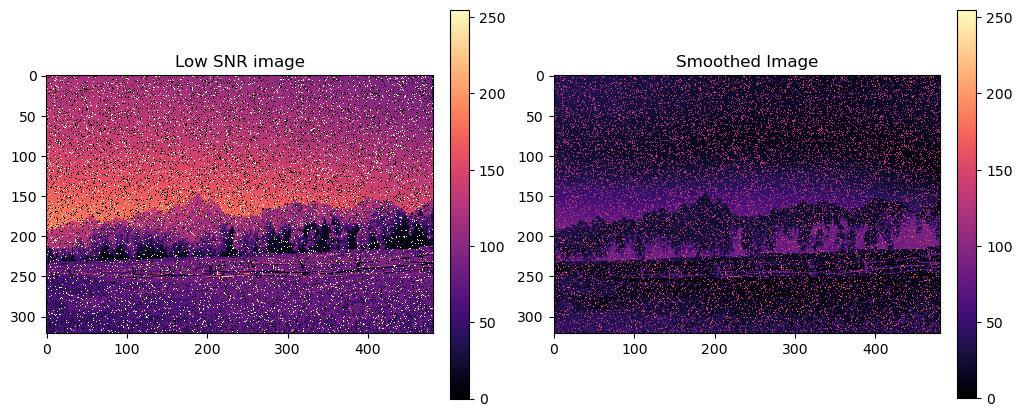

In [21]:
# Perform FFT
f = np.fft.fft2(img_lowSNR)
fshift = np.fft.fftshift(f)

# Create a mask with a central square of 1s
rows, cols = img_lowSNR.shape
crow, ccol = rows//2 , cols//2
mask = np.ones((rows, cols), np.uint8)
r = 1  # Radius of the central square
mask[crow-r:crow+r, ccol-r:ccol+r] = 0

# Apply mask and inverse FFT
fshift = fshift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

pltPair(img_lowSNR, img_back, 'Low SNR image', 'Smoothed Image', 'magma', 'magma', [0,255,0,255], 12)

In [22]:
# Custom dataset for loading images
batch_size = 50

class NoisyImageDataset(Dataset):
    def __init__(self, noisy_dir, clean_dir, transform=None):
        self.noisy_dir = noisy_dir
        self.clean_dir = clean_dir
        self.transform = transform
        self.noisy_images = os.listdir(noisy_dir)
        self.clean_images = os.listdir(clean_dir)

    def __len__(self):
        return len(self.noisy_images)

    def __getitem__(self, idx):
        noisy_img_path = os.path.join(self.noisy_dir, self.noisy_images[idx])
        clean_img_path = os.path.join(self.clean_dir, self.clean_images[idx])
        noisy_image = io.imread(noisy_img_path).astype(np.float32)
        clean_image = io.imread(clean_img_path).astype(np.float32)

       # Normalize to [0, 1] using min and max pixel values of each image
        noisy_image = (noisy_image - noisy_image.min()) / (noisy_image.max() - noisy_image.min())
        clean_image = (clean_image - clean_image.min()) / (clean_image.max() - clean_image.min())


        noisy_image /= noisy_image.max()
        clean_image /= clean_image.max()

        if self.transform:
            noisy_image = self.transform(noisy_image)
            clean_image = self.transform(clean_image)

        return noisy_image, clean_image

# Transformations
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load datasets
full_dataset  = NoisyImageDataset(noisy_dir='/home/davas/Documents/EPIC_4/final/noise_type_detection_dataset/train/impulse', clean_dir='/home/davas/Documents/EPIC_4/final/noise_type_detection_dataset/train/gaussian', transform=transform)
test_dataset  = NoisyImageDataset(noisy_dir='/home/davas/Documents/EPIC_4/final/noise_type_detection_dataset/test/impulse',  clean_dir='/home/davas/Documents/EPIC_4/final/noise_type_detection_dataset/test/gaussian',    transform=transform)


# Split the full dataset into training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, worker_init_fn=worker_init_fn)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, worker_init_fn=worker_init_fn)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, worker_init_fn=worker_init_fn)

# Print the number of elements and batches in each data loader
print(f'Number of elements in train_loader: {len(train_loader.dataset)}')
print(f'Number of batches in train_loader: {len(train_loader)}')

print(f'Number of elements in val_loader: {len(val_loader.dataset)}')
print(f'Number of batches in val_loader: {len(val_loader)}')

print(f'Number of elements in test_loader: {len(test_loader.dataset)}')
print(f'Number of batches in test_loader: {len(test_loader)}')

Number of elements in train_loader: 960
Number of batches in train_loader: 20
Number of elements in val_loader: 240
Number of batches in val_loader: 5
Number of elements in test_loader: 200
Number of batches in test_loader: 4


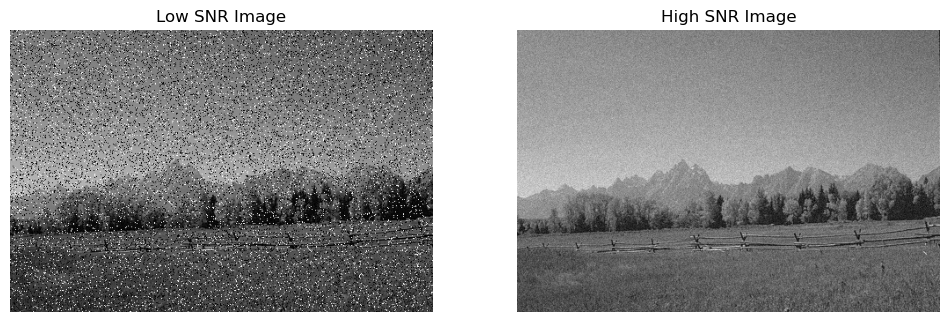

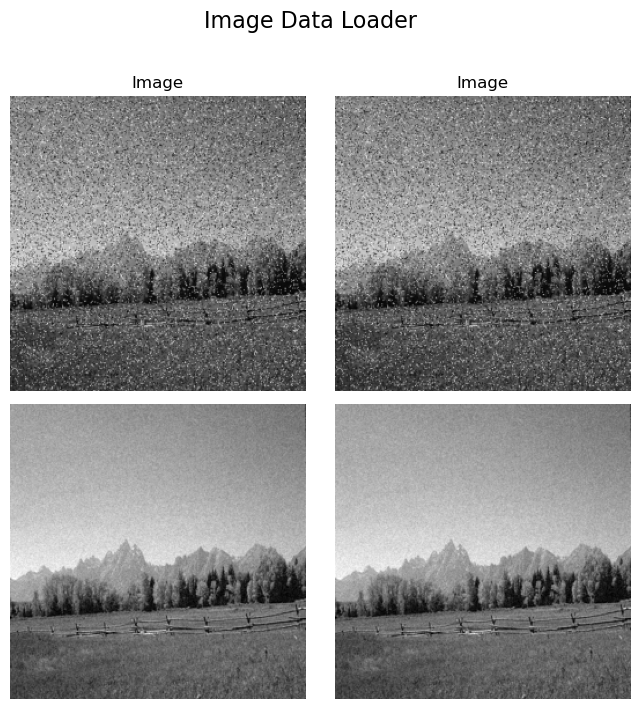

In [25]:
# Rutas a las imágenes
filename_lowSNR = r'/home/davas/Documents/EPIC_4/final/noise_type_detection_dataset/train/impulse/2092sltpepprimgNoise0.95.jpg'
filename_highSNR = r'/home/davas/Documents/EPIC_4/final/noise_type_detection_dataset/train/gaussian/2092gauimgNoise10.jpg'

# Cargar imágenes
img_lowSNR = Image.open(filename_lowSNR)
img_highSNR = Image.open(filename_highSNR)

# Mostrar imágenes
def plot_images(img1, img2, title1, title2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    axes[0].imshow(img1, cmap='gray')
    axes[0].set_title(title1)
    axes[0].axis('off')
    
    axes[1].imshow(img2, cmap='gray')
    axes[1].set_title(title2)
    axes[1].axis('off')
    
    plt.show()

plot_images(img_lowSNR, img_highSNR, 'Low SNR Image', 'High SNR Image')

# Clase personalizada Dataset
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx])
        if self.transform:
            img = self.transform(img)
        return img

# Transformaciones para redimensionar y convertir a tensor
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Redimensionar a un tamaño fijo
    transforms.ToTensor(),
])

# Definir rutas de las imágenes para el DataLoader
image_paths = [
    filename_lowSNR,
    filename_highSNR,
    # Añade más rutas si es necesario
]

# Crear el dataset y el DataLoader
dataset = CustomImageDataset(image_paths=image_paths, transform=transform)
data_loader = DataLoader(dataset, batch_size=2, shuffle=False)

# Función para visualizar pares de imágenes usando el DataLoader
def plot_image_pairs(data_loader, title, Nimages):
    data_iter = iter(data_loader)
    fig, axes = plt.subplots(nrows=Nimages, ncols=2, figsize=(8, 4*Nimages))
    fig.suptitle(title, fontsize=16)
    fig.subplots_adjust(wspace=0.1, hspace=0)  # Ajustar el espaciado entre subplots
    
    imgs = next(data_iter)  # Obtener un lote de imágenes

    # Plotear menos pares de imágenes que el tamaño del lote
    if Nimages > imgs.shape[0]:
        Nimages = imgs.shape[0]

    for i in range(Nimages):
        # Asegurarse de que las imágenes tengan el mismo tamaño
        if imgs[i].shape[1:] != (256, 256):
            print(f"Warning: Image sizes do not match for index {i}")
            continue

        axes[i, 0].imshow(np.transpose(imgs[i], (1, 2, 0)), cmap='gray')
        axes[i, 0].axis('off')
        axes[i, 1].imshow(np.transpose(imgs[i], (1, 2, 0)), cmap='gray')
        axes[i, 1].axis('off')
        if i == 0:
            axes[i, 0].set_title('Image', fontsize=12)
            axes[i, 1].set_title('Image', fontsize=12)
    plt.show()

# Visualizar pares de imágenes usando el DataLoader
plot_image_pairs(data_loader, "Image Data Loader", 2)

In [26]:
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        # Define the encoder part of the autoencoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=2, padding=1),  # First convolutional layer
            nn.BatchNorm2d(32),                        # Batch normalization
            nn.ReLU(),                                 # ReLU activation
            nn.Conv2d(32, 64, 3, stride=2, padding=1), # Second convolutional layer
            nn.BatchNorm2d(64),                        # Batch normalization
            nn.ReLU(),                                 # ReLU activation
            nn.Conv2d(64, 128, 3, stride=2, padding=1),# Third convolutional layer
            nn.BatchNorm2d(128),                       # Batch normalization
            nn.ReLU(),                                 # ReLU activation
            nn.Conv2d(128, 256, 3, stride=2, padding=1),# Fourth convolutional layer
            nn.BatchNorm2d(256),                       # Batch normalization
            nn.ReLU()                                  # ReLU activation
        )
        # Define the decoder part of the autoencoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1), # First transposed convolutional layer
            nn.BatchNorm2d(128),                                                     # Batch normalization
            nn.ReLU(),                                                               # ReLU activation
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1),   # Second transposed convolutional layer
            nn.BatchNorm2d(64),                                                      # Batch normalization
            nn.ReLU(),                                                               # ReLU activation
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),    # Third transposed convolutional layer
            nn.BatchNorm2d(32),                                                      # Batch normalization
            nn.ReLU(),                                                               # ReLU activation
            nn.ConvTranspose2d(32, 1, 3, stride=2, padding=1, output_padding=1),     # Fourth transposed convolutional layer
            nn.Sigmoid()                                                             # Sigmoid activation
        )

    def forward(self, x):
        # Add noise to the input
        noise = torch.randn_like(x) * 0.1  # Gaussian noise
        x_noisy = x + noise
        x_noisy = torch.clamp(x_noisy, 0., 1.)  # Ensure the values are still in the range [0, 1]

        # Encode and decode
        encoded = self.encoder(x_noisy)
        decoded = self.decoder(encoded)
        return decoded


# Initialize model
model = DenoisingAutoencoder().cuda()
summary(model, (1, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             320
       BatchNorm2d-2         [-1, 32, 128, 128]              64
              ReLU-3         [-1, 32, 128, 128]               0
            Conv2d-4           [-1, 64, 64, 64]          18,496
       BatchNorm2d-5           [-1, 64, 64, 64]             128
              ReLU-6           [-1, 64, 64, 64]               0
            Conv2d-7          [-1, 128, 32, 32]          73,856
       BatchNorm2d-8          [-1, 128, 32, 32]             256
              ReLU-9          [-1, 128, 32, 32]               0
           Conv2d-10          [-1, 256, 16, 16]         295,168
      BatchNorm2d-11          [-1, 256, 16, 16]             512
             ReLU-12          [-1, 256, 16, 16]               0
  ConvTranspose2d-13          [-1, 128, 32, 32]         295,040
      BatchNorm2d-14          [-1, 128,

Epoch [1/100], Train Loss: 0.0597, Test Loss: 0.1998, Time: 0.03 seconds
Epoch [2/100], Train Loss: 0.0393, Test Loss: 0.2211, Time: 0.02 seconds
Epoch [3/100], Train Loss: 0.0315, Test Loss: 0.2182, Time: 0.02 seconds
Epoch [4/100], Train Loss: 0.0237, Test Loss: 0.2093, Time: 0.02 seconds
Epoch [5/100], Train Loss: 0.0213, Test Loss: 0.1832, Time: 0.02 seconds
Epoch [6/100], Train Loss: 0.0205, Test Loss: 0.1582, Time: 0.02 seconds
Epoch [7/100], Train Loss: 0.0202, Test Loss: 0.1445, Time: 0.02 seconds
Epoch [8/100], Train Loss: 0.0197, Test Loss: 0.1292, Time: 0.02 seconds
Epoch [9/100], Train Loss: 0.0189, Test Loss: 0.1155, Time: 0.02 seconds
Epoch [10/100], Train Loss: 0.0181, Test Loss: 0.1019, Time: 0.02 seconds
Epoch [11/100], Train Loss: 0.0171, Test Loss: 0.0837, Time: 0.02 seconds
Epoch [12/100], Train Loss: 0.0162, Test Loss: 0.0642, Time: 0.02 seconds
Epoch [13/100], Train Loss: 0.0154, Test Loss: 0.0518, Time: 0.02 seconds
Epoch [14/100], Train Loss: 0.0147, Test Loss: 

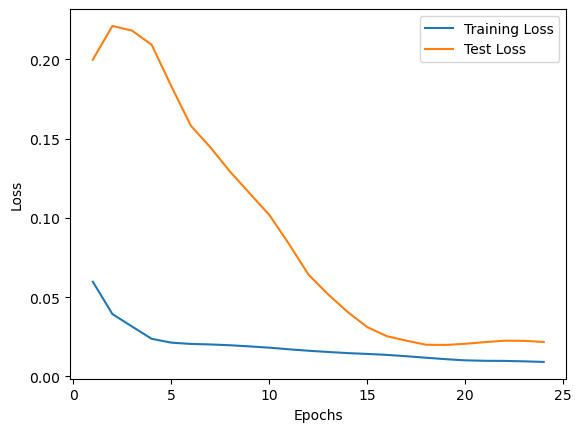

In [31]:
# Definir rutas a las imágenes de entrenamiento y prueba
filename_lowSNR_train = r'/home/davas/Documents/EPIC_4/final/noise_type_detection_dataset/train/impulse/2092sltpepprimgNoise0.95.jpg'
filename_highSNR_train = r'/home/davas/Documents/EPIC_4/final/noise_type_detection_dataset/train/gaussian/2092gauimgNoise10.jpg'
filename_lowSNR_test = r'/home/davas/Documents/EPIC_4/final/noise_type_detection_dataset/test/impulse/DatabaseImage0002sltpepprimgNoise0.95.jpg'
filename_highSNR_test = r'/home/davas/Documents/EPIC_4/final/noise_type_detection_dataset/test/gaussian/DatabaseImage0002gauimgNoise10.jpg'

# Clase personalizada Dataset
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx])
        if self.transform:
            img = self.transform(img)
        return img

# Transformaciones para redimensionar y convertir a tensor
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Redimensionar a un tamaño fijo
    transforms.ToTensor(),
])

# Definir rutas de las imágenes para el DataLoader
train_image_paths = [
    filename_lowSNR_train,
    filename_highSNR_train,
    # Añade más rutas si es necesario
]

test_image_paths = [
    filename_lowSNR_test,
    filename_highSNR_test,
    # Añade más rutas si es necesario
]

# Crear el dataset y el DataLoader para entrenamiento y prueba
train_dataset = CustomImageDataset(image_paths=train_image_paths, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

test_dataset = CustomImageDataset(image_paths=test_image_paths, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

# Parámetros de entrenamiento
num_epochs = 100
learning_rate = 0.005
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
patience = 5  # Paciencia para el early stopping

# Almacenar pérdidas
train_losses = []
test_losses = []
best_test_loss = float('inf')
patience_counter = 0

# Bucle de entrenamiento
for epoch in range(num_epochs):
    start_time = time.time()  # Tiempo de inicio para la época
    model.train()
    train_loss = 0.0
    for data in train_loader:
        noisy_imgs = data
        noisy_imgs = noisy_imgs.cuda()  # Mover imágenes a GPU si disponible
        outputs = model(noisy_imgs)
        loss = criterion(outputs, noisy_imgs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Bucle de prueba
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            noisy_imgs = data
            noisy_imgs = noisy_imgs.cuda()  # Mover imágenes a GPU si disponible
            outputs = model(noisy_imgs)
            loss = criterion(outputs, noisy_imgs)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    epoch_time = time.time() - start_time  # Calcular duración de la época
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Time: {epoch_time:.2f} seconds')

    # Early stopping
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print("Early stopping triggered")
        break

# Graficar la pérdida de entrenamiento y prueba
plt.figure()
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

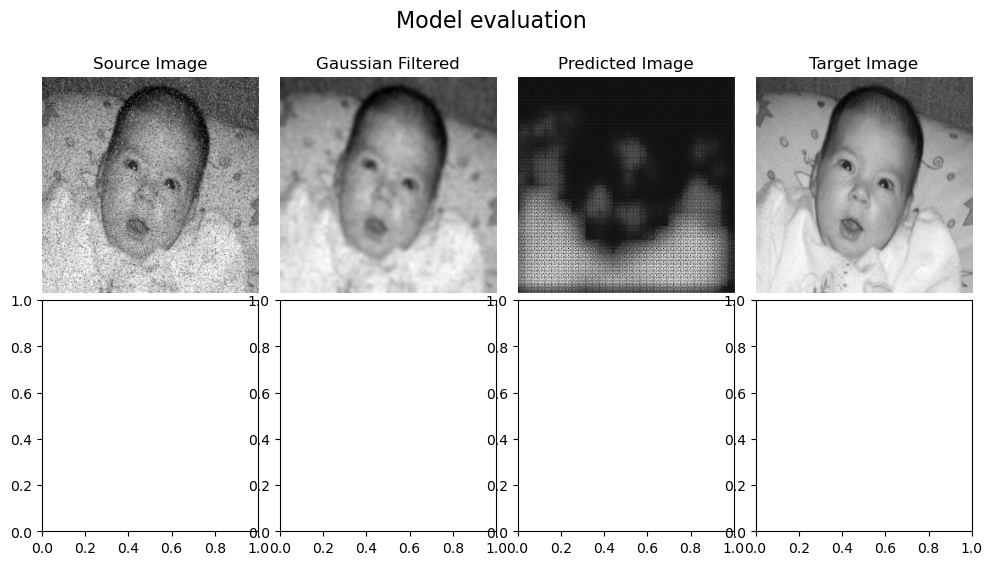

In [35]:
# Clase personalizada Dataset
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx])
        if self.transform:
            img = self.transform(img)
        return img

# Transformaciones para redimensionar y convertir a tensor
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Redimensionar a un tamaño fijo
    transforms.ToTensor(),
])

# Definir rutas de las imágenes para el DataLoader
train_image_paths = [
    filename_lowSNR_train,
    filename_highSNR_train,
    # Añade más rutas si es necesario
]

test_image_paths = [
    filename_lowSNR_test,
    filename_highSNR_test,
    # Añade más rutas si es necesario
]

# Crear el dataset y el DataLoader para entrenamiento y prueba
train_dataset = CustomImageDataset(image_paths=train_image_paths, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

test_dataset = CustomImageDataset(image_paths=test_image_paths, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

# Evaluación del modelo
NimagesToShow = 2
fig, axes = plt.subplots(nrows=NimagesToShow, ncols=4, figsize=(12, 3*NimagesToShow))
fig.suptitle("Model evaluation", fontsize=16)
fig.subplots_adjust(wspace=0.1, hspace=0) # Ajustar el espacio entre subplots

model.eval()
with torch.no_grad():
    data_iter = iter(test_loader)
    noisy_images, clean_images = next(data_iter)  # get N pairs of images, N = batch size

    # Añadir dimensión de batch si es necesario
    if noisy_images.dim() == 3:  # Si solo tiene 3 dimensiones
        noisy_images = noisy_images.unsqueeze(0)  # Añadir dimensión de batch

    noisy_images = noisy_images.cuda()
    outputs = model(noisy_images)

    noisy_images = noisy_images.cpu()  # Mover a CPU
    outputs = outputs.cpu()            # Mover outputs a CPU
    clean_images = clean_images.cpu()  # Mover clean_images a CPU

    # Verificar si hay suficientes imágenes para mostrar
    if NimagesToShow > noisy_images.shape[0]:
        NimagesToShow = noisy_images.shape[0]

    for i in range(NimagesToShow):
        # Squeeze la imagen para eliminar el canal adicional
        noisy_img = np.squeeze(noisy_images[i].numpy())
        clean_img = np.squeeze(clean_images[i].numpy())
        output_img = np.squeeze(outputs[i].numpy())
        
        axes[i, 0].imshow(noisy_img, cmap='gray')
        axes[i, 0].axis('off')
        axes[i, 1].imshow(np.squeeze(gaussian_filter(noisy_img, sigma=2)), cmap='gray')
        axes[i, 1].axis('off')
        axes[i, 2].imshow(output_img, cmap='gray')
        axes[i, 2].axis('off')
        axes[i, 3].imshow(clean_img, cmap='gray')
        axes[i, 3].axis('off')
        if i == 0:
            axes[i, 0].set_title('Source Image', fontsize=12)
            axes[i, 1].set_title('Gaussian Filtered', fontsize=12)
            axes[i, 2].set_title('Predicted Image', fontsize=12)
            axes[i, 3].set_title('Target Image', fontsize=12)

plt.show()


   PSNR Autoencoder  PSNR Gaussian  SSIM Autoencoder  SSIM Gaussian  \
0         15.736439      26.561784          0.284258       0.751039   

   MSE Autoencoder  MSE Gaussian  MAE Autoencoder  MAE Gaussian  
0          0.02669      0.002207         0.139451      0.040555  


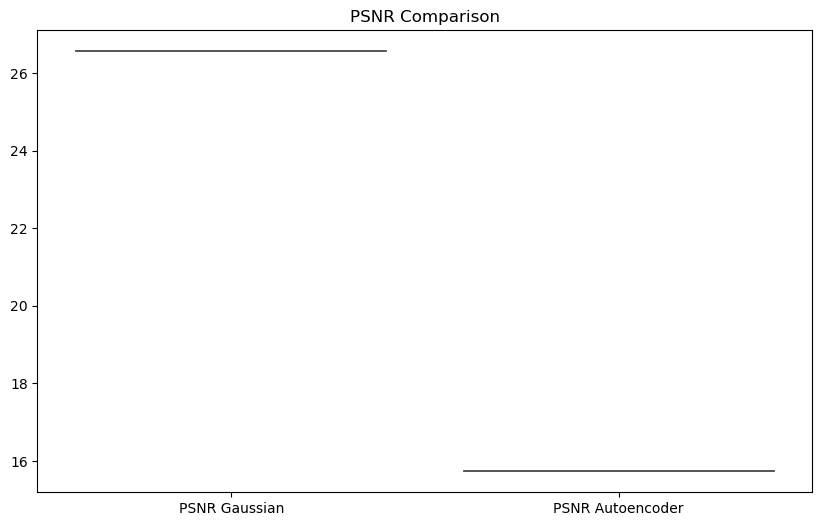

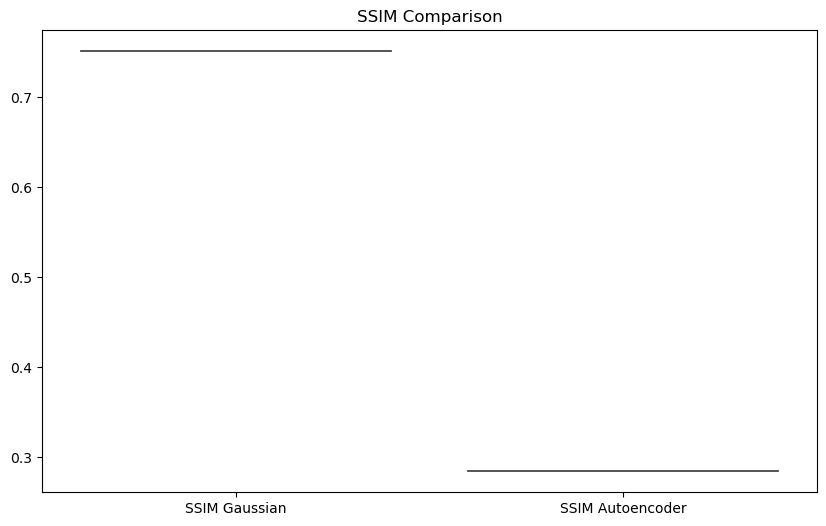

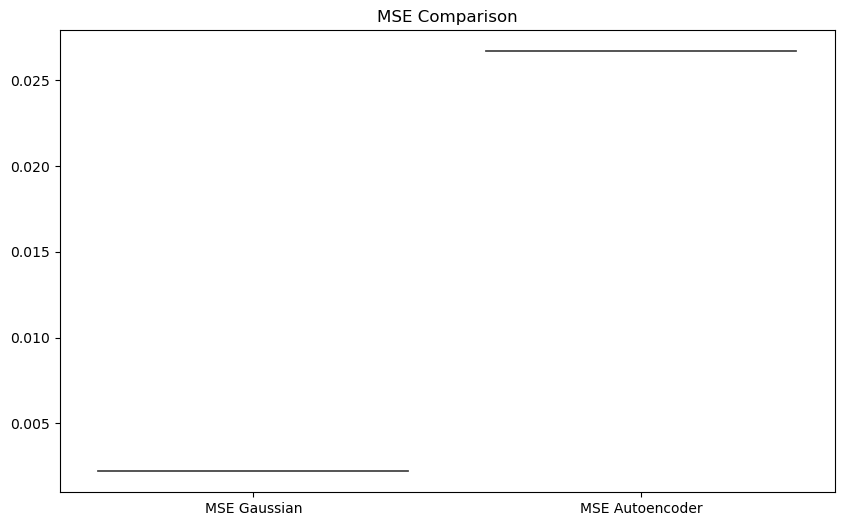

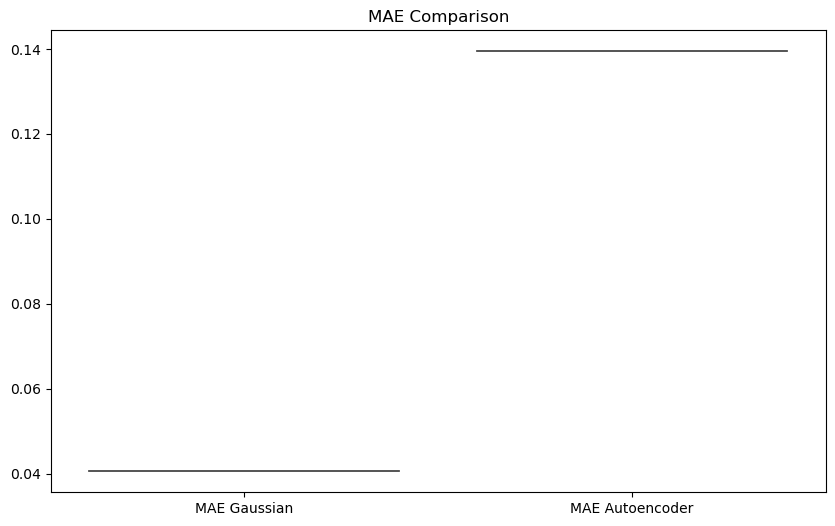

In [39]:
# Inicializar listas para métricas
psnr_list, ssim_list, mse_list, mae_list = [], [], [], []
psnr_gaussian, ssim_gaussian, mse_gaussian, mae_gaussian = [], [], [], []

def calculate_metrics(clean, denoised):
    clean = clean.astype(np.float32)
    denoised = denoised.astype(np.float32)
    
    imse = mse(clean, denoised)
    psnr = 10 * log10(1 / imse)
    
    data_range = clean.max() - clean.min()  # Determina el rango de los valores de la imagen
    s = ssim(clean, denoised, data_range=data_range)
    
    imae = mae(clean, denoised)
    return psnr, s, imse, imae

with torch.no_grad():
    for i, data in enumerate(test_loader):
        noisy_imgs, clean_imgs = data
        noisy_imgs, clean_imgs = noisy_imgs.cuda(), clean_imgs.cuda()
        
        if noisy_imgs.dim() == 3:
            noisy_imgs = noisy_imgs.unsqueeze(0)  # Añadir dimensión de batch

        outputs = model(noisy_imgs)

        for j in range(len(outputs)):
            noisy_img = noisy_imgs[j].cpu().numpy().squeeze()
            clean = clean_imgs[j].cpu().numpy().squeeze()
            denoised = outputs[j].cpu().numpy().squeeze()
            gaussian_img = gaussian_filter(noisy_img, sigma=2)

            psnr, s, imse, imae = calculate_metrics(clean, denoised)
            psnr_list.append(psnr)
            ssim_list.append(s)
            mse_list.append(imse)
            mae_list.append(imae)

            psnr_g, s_g, imse_g, imae_g = calculate_metrics(clean, gaussian_img)
            psnr_gaussian.append(psnr_g)
            ssim_gaussian.append(s_g)
            mse_gaussian.append(imse_g)
            mae_gaussian.append(imae_g)

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame({
    'PSNR Autoencoder': psnr_list,
    'PSNR Gaussian': psnr_gaussian,
    'SSIM Autoencoder': ssim_list,
    'SSIM Gaussian': ssim_gaussian,
    'MSE Autoencoder': mse_list,
    'MSE Gaussian': mse_gaussian,
    'MAE Autoencoder': mae_list,
    'MAE Gaussian': mae_gaussian,
})

# Verificar el contenido del DataFrame
print(metrics_df.head())

# Plotear resultados
plt.figure(figsize=(10, 6))
sns.violinplot(data=metrics_df[['PSNR Gaussian', 'PSNR Autoencoder']], inner="quartile")
plt.title('PSNR Comparison')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=metrics_df[['SSIM Gaussian', 'SSIM Autoencoder']], inner="quartile")
plt.title('SSIM Comparison')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=metrics_df[['MSE Gaussian', 'MSE Autoencoder']], inner="quartile")
plt.title('MSE Comparison')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=metrics_df[['MAE Gaussian', 'MAE Autoencoder']], inner="quartile")
plt.title('MAE Comparison')
plt.show()